黒(-1)の割合は 0.52


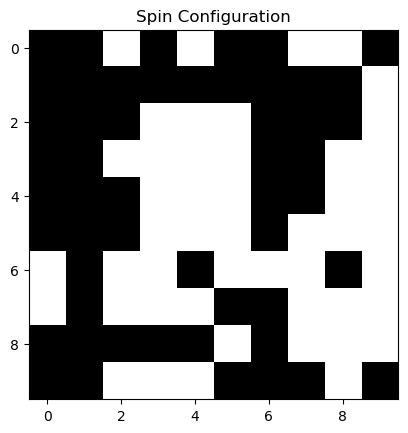

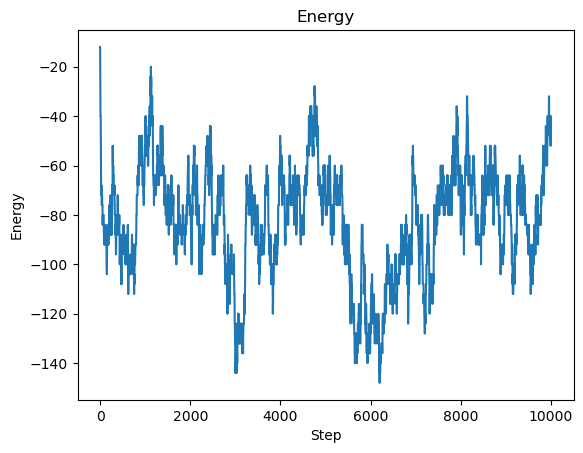

In [2]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

# 関数を定義
def metropolis_ising(L, T, num_steps, J=1):
    lattice = np.random.choice([-1, 1], size=(L, L))
    energies = []
    
    for step in range(num_steps):
        i = np.random.randint(L)
        j = np.random.randint(L)
        
        
        # 近傍のスピンの総和を計算（周期境界条件を適用）
        total = lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] + \
                lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
        
        # エネルギー差を計算
        delta_energy = 2 * J * lattice[i, j] * total
        
        if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / T):
            # スピンを反転させる
            lattice[i, j] *= -1
            
        energies.append(-J * np.sum(lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1))))
        
    # スピン変数全体を反転させるかどうかのif文(いらないかも)
    # 図だと黒の割合が必ず50%以上になるようにしている
    if np.sum(lattice==1) >= L*L/2:
        lattice = lattice*-1
    else:
        lattice = lattice

    return lattice, energies


# Metropolisモンテカルロ法によるサンプリング
# L=10, T=3, num_steps=10000
lattice, energies = metropolis_ising(10, 3.00, 10000)

# 黒の割合を出力
print("黒(-1)の割合は",np.sum(lattice==-1)/lattice.size)

# スピン配位の可視化
plt.imshow(lattice, cmap='gray', interpolation='nearest')
plt.title("Spin Configuration")
plt.show()

# エネルギーの変化の可視化
plt.plot(energies)
plt.title("Energy")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()



In [10]:
print(lattice)

[[ 1  1 -1 -1 -1  1 -1 -1 -1  1]
 [-1  1  1 -1 -1  1  1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1 -1  1]
 [-1  1 -1 -1  1 -1 -1 -1  1  1]
 [-1  1 -1 -1 -1  1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1 -1  1  1 -1]
 [ 1  1 -1  1  1  1 -1  1  1 -1]]


In [3]:
print(np.ndarray.flatten(lattice))

[-1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1
  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1
  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1
 -1 -1  1 -1]


T=1からT=6まで，0.25刻みで配位データを取得

In [5]:
# 格子サイズを10，マルコフモンテルロ法のステップ数を100*L^2=10000に設定
L = 10 
num_steps = 100*L^2

# とりあえず101列の配列を作成
dataset = np.arange(101)

# 一次元データを得る
for T in tqdm(np.arange(0.0, 6.01, 0.25)):
    # T=0はmetropolis_isingには定義されていないのでT=0.01をT=0のデータとする
    if T==0.0:
        T = 0.01     
    # 各温度で1000個ずつ配位を作成   
    for i in tqdm(range(10)):
        lattice, energies = metropolis_ising(L, T, num_steps)
        data = np.append(lattice, T)
        # dataをdatasetに追加
        dataset = np.vstack((dataset, data))
    
# とりあえずで作成した1列目を削除
dataset = np.delete(dataset, 0, axis=0)


100%|██████████| 25/25 [00:20<00:00,  1.20it/s]


In [11]:
print(lattice[0])

[ 1  1 -1 -1 -1  1 -1 -1 -1  1]


In [6]:
# データサイズの確認
print(np.shape(dataset))

(250, 101)


In [9]:
print(dataset[10])

[-1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.    1.    1.    1.
  1.    1.   -1.   -1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.   -1.   -1.   -1.   -1.
  1.    1.    1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.    0.25]


In [ ]:
# Numpy配列をPandasのデータフレームに変換
df = pd.DataFrame(dataset)

# CSVファイルを101列目だけ小数第2位で表示するため
fmt_list = ['%d']*100 + ['%.2f']

# csvファイルで保存
df.to_csv('dataframe.csv', index=False)

In [ ]:
df.shape

(25000, 101)